In [7]:
import keras

In [9]:
# load MINIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
# check dataset shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(-0.5, 27.5, 27.5, -0.5)

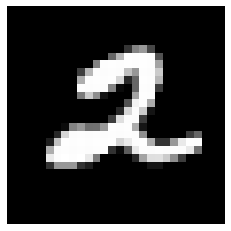

In [17]:
# Let's check the images randomly
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
plt.imshow(x_train[c], cmap='gray')
plt.axis('off')

In [19]:
# see the differece x_train[c] 
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,71,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,252,82,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,253,163,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,62,...,252,203,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,173,...,253,183,0,0,0,0,0,0,0,0


In [29]:
# Data Preprocessing
# 1. Normalization
#  Keras matches the normalized images while preparing weights randomly
#  (1) method: 0~ 1 (2) method: -1~1
#  keras MLP: must be 1D
x_train_shaped = x_train.reshape(60000, 784) / 255 
x_test_shaped = x_test.reshape(10000, 784) / 255 

# Demo: x_train_shaped
x_train_shaped[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [41]:
# 2. Answer Preprocessing --> One-hot encoding
# Ans: [P0, P1, P2.....P9]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print('before one-hot encoding: ', y_train[100])
print('after one-hot encoding:', y_train_cat[100])

before one-hot encoding:  5
after one-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [47]:
# Build the model
# 1. Framework -> (Sequential), Adding layers --> (Layers)
#  Layers: Fully-connected layers
from keras.models import Sequential
from keras.layers import Dense

mlp = Sequential()
# First layer: input_dim --> indicate how many of  inputs
mlp.add(Dense(128, activation='relu', input_dim = 784))
mlp.add(Dense(10, activation='softmax'))     
mlp.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Confirm the training model
# Random (weights) --> gradient decent
# loss: one output --> binary_crossentroy; multiple output --> categorical_crossentropy
# optimizer: optimize as it goest decently, --> based on Momentum (動量)
mlp.compile(loss = 'categorical_crossentropy', 
                    metrics = ['accuracy'],
                    optimizer = 'adam',
                    )

In [55]:
# batch: 看幾筆(200)作一次梯度下降(修正)
# epochs: 整份題目看幾次(10)
# 10 epochs, 200 batchs: 60000 * 10 / 200 --> 3000(次)
mlp.fit(x_train_shaped, 
            y_train_cat, 
            batch_size=200, 
            epochs= 15, 
#           verbose=0 (沒有); verbose=1(完整); verbose=2 
            validation_split=0.1 )

Epoch 1/5
270/270 [==============================] - 1s 5ms/step - loss: 0.0402 - accuracy: 0.9891 - val_loss: 0.0779 - val_accuracy: 0.9782
Epoch 2/5
270/270 [==============================] - 1s 5ms/step - loss: 0.0354 - accuracy: 0.9909 - val_loss: 0.0779 - val_accuracy: 0.9777
Epoch 3/5
270/270 [==============================] - 1s 5ms/step - loss: 0.0308 - accuracy: 0.9919 - val_loss: 0.0769 - val_accuracy: 0.9785
Epoch 4/5
270/270 [==============================] - 1s 5ms/step - loss: 0.0272 - accuracy: 0.9935 - val_loss: 0.0773 - val_accuracy: 0.9787
Epoch 5/5
270/270 [==============================] - 1s 5ms/step - loss: 0.0237 - accuracy: 0.9943 - val_loss: 0.0812 - val_accuracy: 0.9780


In [59]:
mlp.evaluate(x_test_shaped, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9783


[0.07509610801935196, 0.9782999753952026]

In [75]:
# model.predict -> probabilibty; model.predict_classes -> classfication
# mlp.predict(x_test_shaped)
pre = mlp.predict_classes(x_test_shaped)

from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, pre)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,970,1,1,0,1,1,3,1,1,1
1,0,1125,4,0,0,0,2,0,4,0
2,4,1,1015,1,1,0,2,2,6,0
3,1,0,9,985,0,2,0,3,8,2
4,1,0,6,1,959,0,1,1,3,10
5,3,0,0,12,1,862,8,0,5,1
6,5,2,1,1,3,3,942,0,1,0
7,1,4,10,3,3,0,0,1001,1,5
8,4,1,3,2,3,3,2,3,951,2
9,3,4,0,8,6,5,1,4,5,973


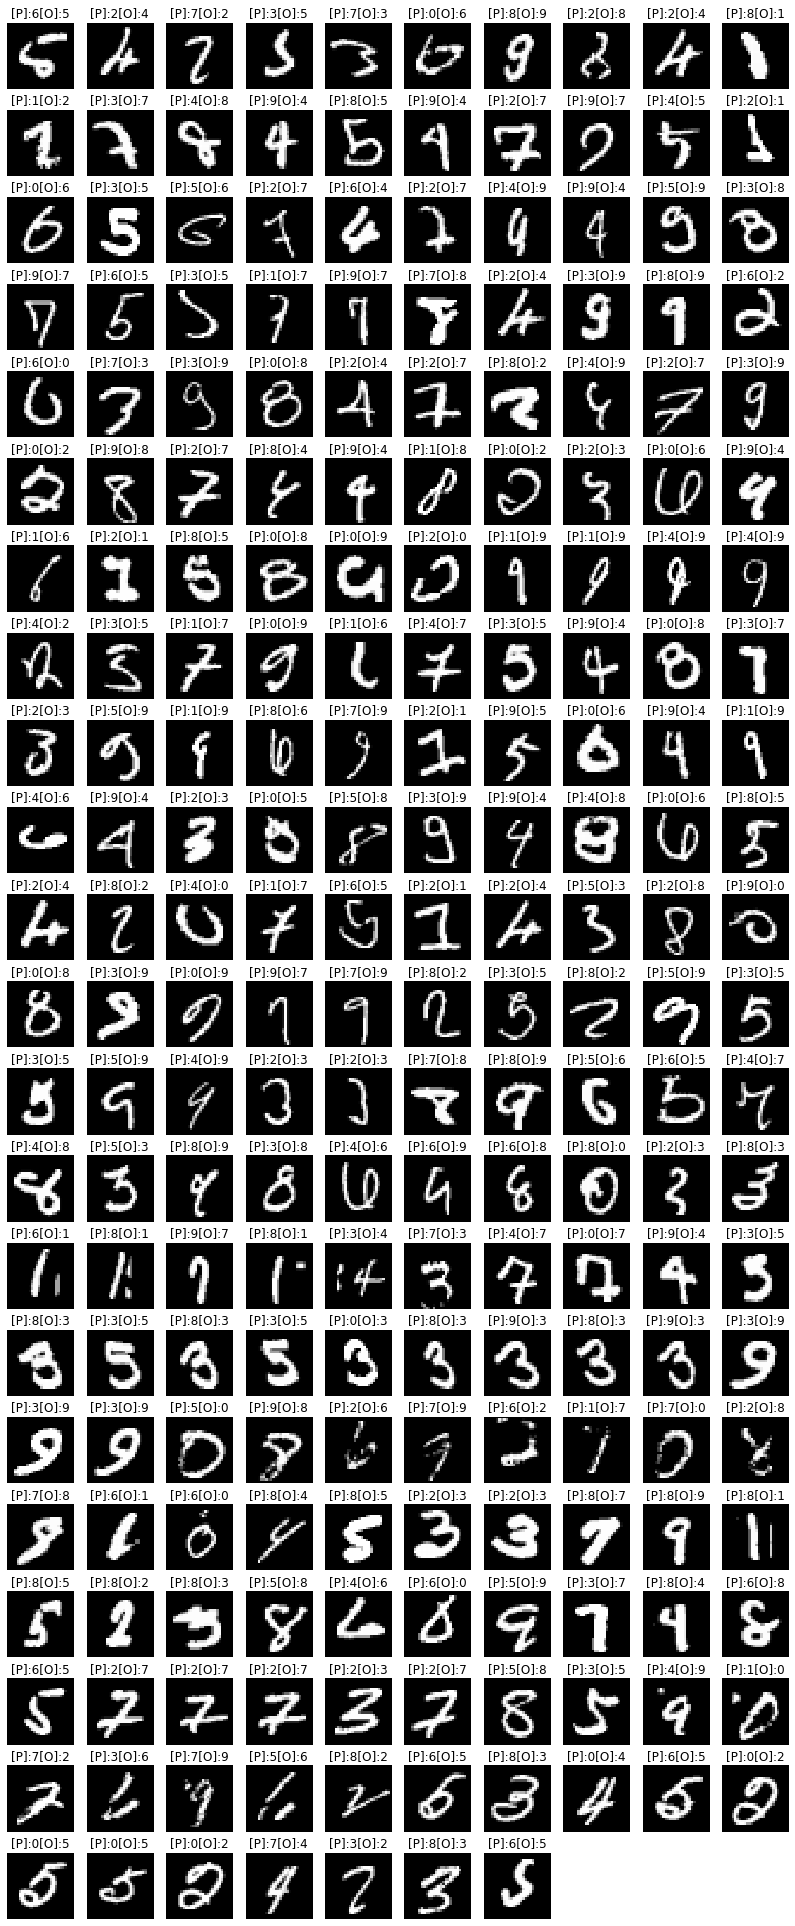

In [88]:
# numpy: compare each numbers of two sets
import numpy as np
# list: list (one number)
# numpy array: nparray (many numbers)
diff = np.nonzero(pre != y_test)[0]

# Correct label (original data)
orifalse = y_test[diff]
#  Wrong prediction
prefalse = pre[diff]
# take images from x_test dataset
imgfalse = x_test[diff]

# set width, hight fot the plot
plt.figure(figsize=(14,35))
# each row has 10 images
width = 10
hight = len(imgfalse) / 10 + 1
for (i, img) in enumerate(imgfalse):
    # (row, column, from i images...)
    plt.subplot(hight, width, i+1)
    plt.axis('off')
    t = '[P]:' + str(prefalse[i]) + '[O]:' + str(orifalse[i])
    plt.title(t)
    plt.imshow(img, cmap='gray')